<div>
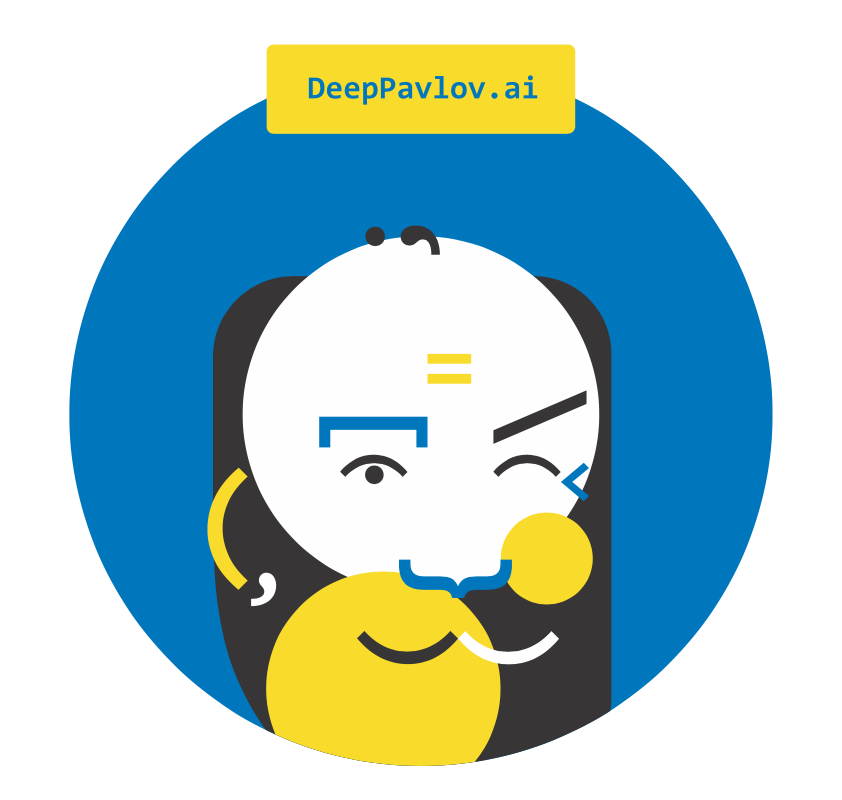
</div>

# <center>Triplet Extraction for Russian</center>

<center>In this small tutorial, we are going to show how the relation extraction could be done with a sentence as an input and automatical entity pair and relation extracton. </center> 

For this task we used already trained relation extraction model for Russian language on RuRED (for more details please refer to Relation_extraction_Russian_tutorial)

In [1]:
from deeppavlov import configs, build_model

In [2]:
tr_extr = build_model(configs.relation_extraction.triplet_extractor, download=False)

[nltk_data] Downloading package punkt to /home/evseev/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/evseev/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package perluniprops to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /home/evseev/nltk_data...
[nltk_data]   Package nonbreaking_prefixes is already up-to-date!


2021-07-19 15:09:39.559 WARNING in 'deeppavlov.core.common.registry'['registry'] at line 56: Registry name "triplet_extractor" has been already registered and will be overwritten.
2021-07-19 15:09:47.129 INFO in 'deeppavlov.core.data.simple_vocab'['simple_vocab'] at line 115: [loading vocabulary from /cephfs/home/evseev/.deeppavlov/models/ner_rured/tag.dict]
2021-07-19 15:10:35.805 INFO in 'deeppavlov.models.torch_bert.torch_transformers_sequence_tagger'['torch_transformers_sequence_tagger'] at line 361: Load path /cephfs/home/evseev/.deeppavlov/models/ner_rured/model is given.
2021-07-19 15:10:35.814 INFO in 'deeppavlov.models.torch_bert.torch_transformers_sequence_tagger'['torch_transformers_sequence_tagger'] at line 368: Load path /cephfs/home/evseev/.deeppavlov/models/ner_rured/model.pth.tar exists.
2021-07-19 15:10:35.816 INFO in 'deeppavlov.models.torch_bert.torch_transformers_sequence_tagger'['torch_transformers_sequence_tagger'] at line 369: Initializing `TorchTransformersSeque

2021-07-19 15:10:57.512 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 145: Load path /cephfs/home/evseev/.deeppavlov/models/re_rured/model is given.
2021-07-19 15:10:57.516 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 152: Load path /cephfs/home/evseev/.deeppavlov/models/re_rured/model.pth.tar exists.
2021-07-19 15:10:57.518 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 153: Initializing `REBertModel` from saved.
2021-07-19 15:10:57.520 INFO in 'deeppavlov.models.classifiers.torch_re_bert'['torch_re_bert'] at line 157: From pretrained DeepPavlov/rubert-base-cased.
2021-07-19 15:11:31.250 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 159: Loading weights from /cephfs/home/evseev/.deeppavlov/models/re_rured/model.pth.tar.
2021-07-19 15:11:53.31 INFO in 'deeppavlov.core.models.torch_model'['torch_model'] at line 98: Model was successfully initialized! Model summary:
 BertWithAdaThresholdLocContextPool

In [11]:
# example 1
# Elon Musk lives in Seattle.

sentence = "Илон Маск живет в Сиэттле."      
res = tr_extr([sentence])
print(res)

entity_positions [[0, 1], [4]]
[[[['илон маск', 'место жительства', 'сиэттле'], ['Q317521', 'P551', 'Q107167']]]]


In [12]:
# example 2
# However, Elon Musk was born in South America.

sentence = "Но родился Илон Маск в Южной Америке."      
res = tr_extr([sentence])
print(res)

entity_positions [[2, 3], [5, 6]]
[[[['илон маск', 'страна происхождения', 'южной америке'], ['Q317521', 'P495', 'Q5948829']]]]


In [13]:
# example 3
# Elon Musk owns Tesla company.

sentence = "Илон Маск владеет компанией Тесла."      
res = tr_extr([sentence])
print(res)

entity_positions [[0, 1], [4]]
[[[['илон маск', 'владеет', 'тесла'], ['Q317521', 'P1830', 'Q9036']]]]


In [14]:
# example 4
# Head office of Tesla is located in New York.

sentence = "Главный офис Тесла находится в Нью-Йорке ."
res = tr_extr([sentence])
print(res)

entity_positions [[2], [5], [6], [7]]
[[[['тесла', 'расположение штаб-квартиры', 'нью'], ['Q9036', 'P159', 'Q5361374']], [['тесла', 'расположение штаб-квартиры', '-'], ['Q9036', 'P159', 'not_in_wiki']], [['тесла', 'расположение штаб-квартиры', 'йорке'], ['Q9036', 'P159', 'Q213573']], [['нью', 'расположение штаб-квартиры', '-'], ['Q5361374', 'P159', 'not_in_wiki']], [['нью', 'расположение штаб-квартиры', 'йорке'], ['Q5361374', 'P159', 'Q213573']], [['-', 'расположение штаб-квартиры', 'йорке'], ['not_in_wiki', 'P159', 'Q213573']]]]


In [15]:
# example 5
# Elon Musk sun's name is X Æ A-Xii.

sentence = "Сына Илона Маска зовут X Æ A-Xii."
res = tr_extr([sentence])
print(res)

entity_positions [[1, 2], [4, 5, 6, 7, 8]]
[[[['илона маска', 'дети', 'x æ a-xii'], ['Q46845259', 'P40', 'not_in_wiki']]]]


In [16]:
# example 6
# Elon Musk is 50 years old.

sentence = "Илону Маску 50 лет."
res = tr_extr([sentence])
print(res)

entity_positions [[0], [1], [2, 3]]
[[[['илону', 'дети', 'маску'], ['Q132204', 'P40', 'Q1017127']], [['илону', 'AGE_IS', '50 лет'], ['Q132204', 'AGE_IS', 'Q241428']], [['маску', 'AGE_IS', '50 лет'], ['Q1017127', 'AGE_IS', 'Q241428']]]]


In [17]:
# example 7
# Moscow is the capital city of Russia. 

sentence = "Москва - столица России."
res = tr_extr([sentence])
print(res)

entity_positions [[0], [3]]
[[[['москва', 'расположение штаб-квартиры', 'россии'], ['Q649', 'P159', 'Q159']]]]


Congarts! You tried triplet extraction with DeepPavlov. More tutorials are yet to come :)